In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
seaborn.set()

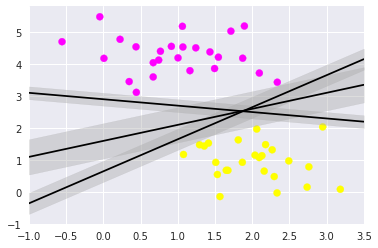

In [3]:
#make_blobs聚类数据生成器
from sklearn.datasets.samples_generator import make_blobs
#50个样本,2个类别,cluster_std为方差,random_state为随机数种子
X, y = make_blobs(n_samples = 50, centers = 2,
                 random_state = 0, cluster_std = 0.6)
#取(-1,3.5)之间100个均匀分布点
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0],X[:, 1], c = y, s = 50, cmap = 'spring')

# 其实随意给定3组参数，就可以画出3条不同的直线，但它们都可以把图上的2类样本点分隔开
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [12]:
#svm分类
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

* decision_function_shape是多分类方法，一对多还是一对一，一对多是把一类与其它类分为两类，需要k个分类器;一对一是，每一类与其它类都有一个分类器，k(k-1)/2个，比较好

In [65]:
def plot_decision_function(svc,X,y):
    svc.fit(X,y)
    #画出三点图
    plt.scatter(X[:, 0],X[:, 1],c=y,s=50,cmap='spring')
    
    #画分割超平面
    w = svc.coef_[0]
    a = -w[0]/w[1]
    X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #Y_min, Y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx = np.linspace(X_min, X_max)
    yy = a*xx - svc.intercept_[0]/w[1]
    plt.plot(xx,yy,'k-')

    #画出边界超平面
    b = svc.support_vectors_[0]
    yy_up = a*(xx - b[0]) + b[1]
    plt.plot(xx,yy_up,'k--')

    b = svc.support_vectors_[-1]
    yy_down = a*(xx - b[0]) + b[1]
    plt.plot(xx,yy_down,'k--')

    #标记支持向量
    plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
                s=200, facecolors='none')

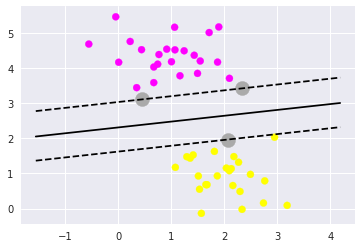

In [52]:
plot_decision_function(svc,X,y)

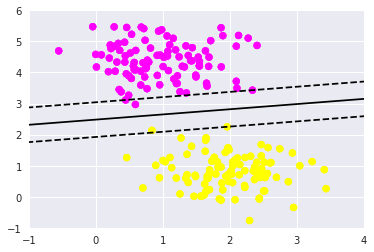

In [80]:
#看样本点分布如何影响超平面
from ipywidgets import interact
def plot_svm(N=100):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[0:N]
    y = y[0:N]
    clf = SVC(kernel='linear')
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1,4)
    plt.ylim(-1,6)
    plot_decision_function(clf,X,y)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
interact(plot_svm,N=200,kernel='linear');

# 支持向量机与核函数
非线性可切分数据集，要做分割，就要借助于核函数了
核函数可以看做对原始特征的一个映射函数，不过SVM不会傻乎乎对原始样本点做映射，它有更巧妙的方式来保证这个过程的高效性。
线性的kernel(线性的SVM)对于这种非线性可切分的数据集无用

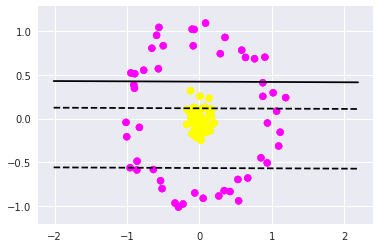

In [66]:
#使用线性svm
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear')
clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_decision_function(clf,X,y)

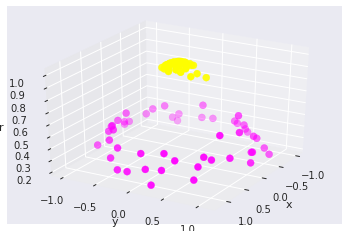

In [75]:
#使用高斯核函数rbf
r = np.exp(-(X[:, 0]**2 + X[:, 1]**2))

from mpl_toolkits import mplot3d
def plot_3D_SVM(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D_SVM,elev=30,azip=0);

In [85]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

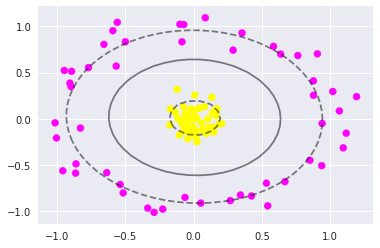

In [86]:
#使用高斯核函数
clf = SVC(kernel='rbf')
clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

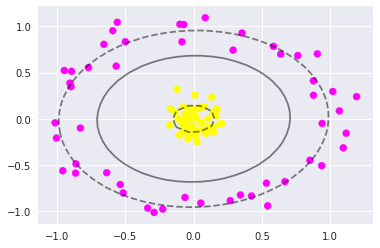

In [96]:
#使用高斯核函数
clf = SVC(kernel='poly',degree=2)
clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

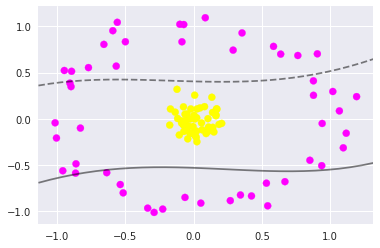

In [97]:
#使用sigmoid
clf = SVC(kernel='sigmoid')
clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');